# Challenge Matplotlib

Martin Singla - Data Analyst

Coding challenge using Python Matplotlib framework , part of the Data Analytics Bootcamp program by Tecnológico de Monterrey

### Data Loading , Exploration & Cleaning

In [1]:
#loading dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#loading data
mouses = pd.read_csv("data/Mouse_metadata.csv")
results = pd.read_csv("data/Study_results.csv")

#Basic exploration of the df

#Mouses df
mouses.head()
len(mouses["Mouse ID"].unique()) #249 unique mouses
mouses["Mouse ID"].value_counts()[mouses["Mouse ID"].value_counts() > 1] #seems to be no repeated values
mouses["Drug Regimen"].value_counts() #10 drugs / 24-25 cases each
mouses["Sex"].value_counts() #50% -50% distribution by sex
mouses.describe() #get summary stats from AGE and WEIGHT variables, both seem relatively nrmally distributed

#Results df
results.head()
len(results["Mouse ID"].unique()) #also 249 unique mouses
len(results["Timepoint"].unique()) #10 unique timepoints
results["Timepoint"].unique() #which go 5 by 5...
results.iloc[:,2].describe() #tumor volume summary stats
results["Metastatic Sites"].unique() #what is this variabl??

#merging dfs
data = pd.merge(results, mouses, on= "Mouse ID", how= "left") 
data.head() #btw, shouldn´t WEIGHT be another experimental variable and not an ID descriptor?

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
#Data cleaning / removing duplicated cases

data[data.duplicated()] #one duplicated entry found (row id 137, mouse ID = g989)
data.loc[data["Mouse ID"] == "g989",:] #the entries for this rat are a mess, we have duplicated timepoints all over the place

data["Mouse ID"].unique() #examples: b128, f932, g107, a457, c819
#try see how other examples should look like
data.loc[data["Mouse ID"] == "a457",:] #checking examples of timepoint series for each rat, there shouldn-t be duplicated values

#master group
a = data.groupby(["Mouse ID", "Timepoint"])["Timepoint"].count() 
a[a > 1] #effectively, Mouse ID g989 is the only case with duplicated timepoints.

data = data.loc[data["Mouse ID"] != "g989",:] #we don´t know what happened with the data entry of that mouse, let´s just drop it
len(data["Mouse ID"].unique()) #df with one less observation

248

### General Statistics by Drug Regimen

In [3]:
#Quick summary stats table of TUMOR VOLUME by DRUG REGIMEN
df1 = data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["count", "mean", "median", "std", "var", "sem"])
df1

,count,mean,median,std,var,sem
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,181,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,148,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,228,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,181,54.233149,52.431737,7.710419,59.450562,0.573111


In [4]:
#Other way of computing summary stats of TUMOR VOLUME by DRUG REGIMEN
a = data.groupby("Drug Regimen")["Tumor Volume (mm3)"]
pd.DataFrame({
    "count": a.count(),
    "Mean": a.mean(), "Median": a.median(),
    "St.Dev.": a.std(),"Variance": a.var(), 
    "SEM": a.std()/np.sqrt(a.count())
})

,count,Mean,Median,St.Dev.,Variance,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,181,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,148,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,228,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,181,54.233149,52.431737,7.710419,59.450562,0.573111


### General Descriptive Graphs

<AxesSubplot:title={'center':'Fig.A - Observations by Drug Regimen'}, xlabel='Drug Regimen', ylabel='Qty. of Observations Taken'>

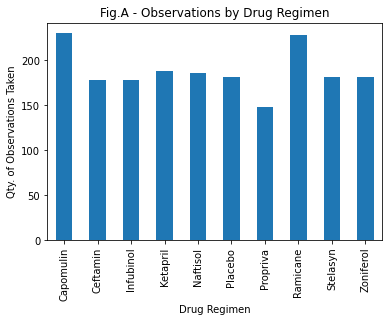

In [5]:
#Plotting data w/ Pandas framework
#Drug regimen distribution
df1.plot(y= "count", kind= "bar", 
         title = "Fig.A - Observations by Drug Regimen",
         xlabel = "Drug Regimen",
         ylabel = "Qty. of Observations Taken",
         legend = False)

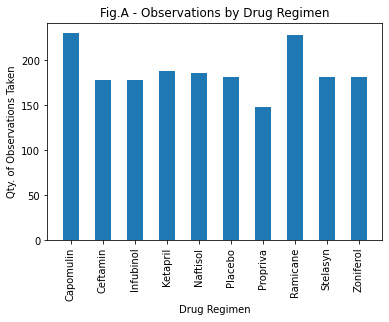

In [6]:
#Plotting data w/ Pyplot framework --> Looks the same as above
#Drug regimen distribution
plt.bar(df1.index, df1["count"], width= 0.5)
plt.title("Fig.A - Observations by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Qty. of Observations Taken")
plt.xticks(rotation= "vertical")
plt.show()

<AxesSubplot:title={'center':'Fig.B - Mouse Population by Sex'}>

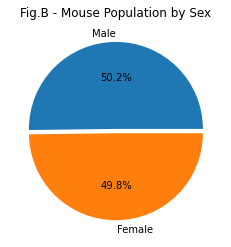

In [7]:
#Plotting data w/ Pandas framework 
#Mice population distribution by Gender
a = pd.DataFrame(mouses["Sex"].value_counts())
a.plot(y="Sex", kind= "pie", explode= [0.025,0.025],
       title = "Fig.B - Mouse Population by Sex",
       ylabel = '', legend = False, autopct='%1.1f%%')

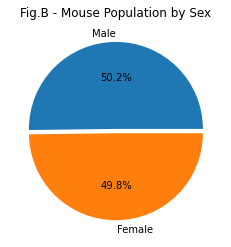

In [8]:
#Plotting data w/ Pyplot framework  --> Looks the same as above
#Mice population distribution by Gender
plt.pie(a["Sex"], autopct='%1.1f%%', explode= [0.025, 0.025], labels= ["Male", "Female"])
plt.title("Fig.B - Mouse Population by Sex")
plt.show()

### Summary Statistics for Final Tumor Volume on Selected Drug Regimenes

In [9]:
#Mouse Final Tumor Volumes by Treatment
df2 = data.groupby("Mouse ID")[["Tumor Volume (mm3)", "Drug Regimen"]].last()
data.loc[data["Mouse ID"] == "a203",:] #To verify I got the right numbers, checked with some mice IDs (a203,a251,a275...)

#In Focus: Capomulin, Ramicane, Infubinol and Ceftamin
df2 = df2.loc[df2["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]), :]

#Calculate stats
df3 = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["describe"])
df3["InterQRange"] = df3["describe"]["75%"] -df3["describe"]["25%"]
df3["LowerBound"] = df3["describe"]["25%"] - (1.5 *  df3["InterQRange"])
df3["UpperBound"] = df3["describe"]["75%"] + (1.5 *  df3["InterQRange"])
outliers = []
for drug in df3.index:
    outliers.append(df2.loc[(df2["Drug Regimen"] == drug) & 
            ((df2["Tumor Volume (mm3)"] > df3.loc[drug, "UpperBound"][0]) | 
             (df2["Tumor Volume (mm3)"] < df3.loc[drug, "LowerBound"][0])), :].count()[0])
df3["OutlierCount"] = outliers

print("-------------------------------------------------------------------------")
print("List of mouses final Tumor Volume (mm3) and Drug Regimen (10 cases)")
print("")
print(df2.head(10))
print("-------------------------------------------------------------------------")
print("Summary Statistics for Most Promising Drug Regimenes")
print("")
print(df3)


-------------------------------------------------------------------------
List of mouses final Tumor Volume (mm3) and Drug Regimen (10 cases)

          Tumor Volume (mm3) Drug Regimen
Mouse ID                                 
a203               67.973419    Infubinol
a251               65.525743    Infubinol
a275               62.999356     Ceftamin
a411               38.407618     Ramicane
a444               43.047543     Ramicane
a520               38.810366     Ramicane
a577               57.031862    Infubinol
a644               32.978522     Ramicane
a685               66.083066    Infubinol
b128               38.982878    Capomulin
-------------------------------------------------------------------------
Summary Statistics for Most Promising Drug Regimenes

             describe                                                        \
                count       mean       std        min        25%        50%   
Drug Regimen                                                       

Seems there are practically no outliers across the 4 top drug regimenes, with the exception of Infubinol which has 1 outlier.

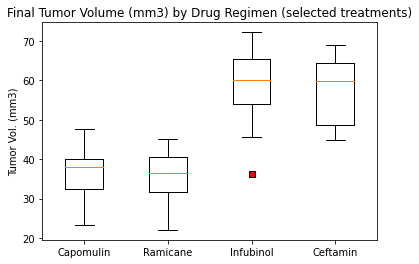

In [10]:
#Define arrays w/ drug regimens
drugs= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
a= []
for i in drugs:
    a.append(df2.loc[df2["Drug Regimen"] == i, "Tumor Volume (mm3)"])

#Plot boxplot
plt.subplots()
plt.boxplot(a, flierprops= dict(markerfacecolor='r', marker='s'))
plt.xticks(ticks= [1,2,3,4],labels =drugs)
plt.ylabel("Tumor Vol. (mm3)")
plt.title("Final Tumor Volume (mm3) by Drug Regimen (selected treatments)")
plt.show()

### Tumor Evolution by Time w/ Capomulin Treatment - Random Mouse Selection

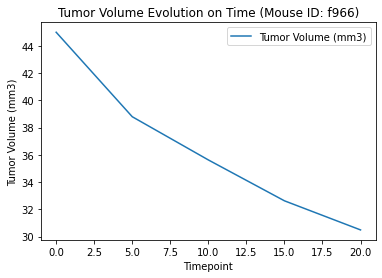

In [52]:
c = data.loc[data["Drug Regimen"] == "Capomulin","Mouse ID"].unique() #array of mouses w/ Capomulin treatment
samp = c[np.random.randint(0, len(c), 1)][0] #random selection of 1 mouse w/ capomulin treatment
samp_dat = data.loc[data["Mouse ID"]== samp,:] #selection of data for that mouse & time series plotting
samp_dat.plot(x= "Timepoint", y= "Tumor Volume (mm3)", 
              title= f"Tumor Volume Evolution on Time (Mouse ID: {samp})",
             ylabel= "Tumor Volume (mm3)") 
plt.show()

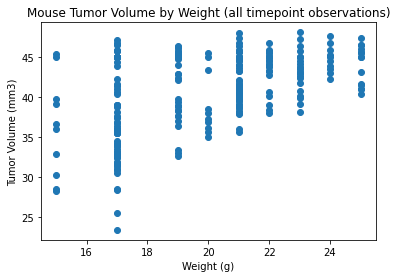

In [88]:
## Mouse weight scatterplot (Capomulin treatment)

plt.scatter(x= data.loc[data["Drug Regimen"] == "Capomulin", "Weight (g)"],
            y= data.loc[data["Drug Regimen"] == "Capomulin", "Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Tumor Volume by Weight (all timepoint observations)")
plt.show()

#seems to be a possitive but not so strong linear relationship. 
#Mouses at timepoints were tumor volumes are larger tend to weight more

In [122]:
#Testing correlation coefs. and regression model.
corCoef =np.corrcoef(x= data.loc[data["Drug Regimen"] == "Capomulin", "Weight (g)"],
                     y= data.loc[data["Drug Regimen"] == "Capomulin", "Tumor Volume (mm3)"])[1][0] 
#Pearson's Corr Coef= 0.5256 
corCoef**2 #R^2= 0.2763 -> weak

from scipy.stats import linregress
lm = linregress(x=  data.loc[data["Drug Regimen"] == "Capomulin", "Weight (g)"],
                y=  data.loc[data["Drug Regimen"] == "Capomulin", "Tumor Volume (mm3)"])
lm_formula = f"Y = {round(lm[1], 2)} + {round(lm[0],2)}* X"  #'Y = 21.49 + 0.96* X'

LinregressResult(slope=0.9609669432428355, intercept=21.489827213299566, rvalue=0.5256995552077169, pvalue=9.605446629501521e-18, stderr=0.10298279892023657, intercept_stderr=2.075157005491298)

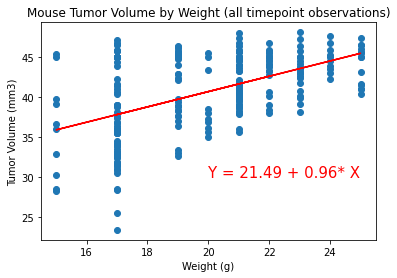

In [121]:
#Plot regress

plt.scatter(x= data.loc[data["Drug Regimen"] == "Capomulin", "Weight (g)"],
            y= data.loc[data["Drug Regimen"] == "Capomulin", "Tumor Volume (mm3)"])
plt.plot(data.loc[data["Drug Regimen"] == "Capomulin", "Weight (g)"],
         data.loc[data["Drug Regimen"] == "Capomulin", "Weight (g)"] * lm[0] +lm[1]
         , "red")
plt.annotate(lm_formula,(20,30),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Tumor Volume by Weight (all timepoint observations)")
plt.show()